In [ ]:
# Install required libraries
!pip install -q requests seaborn matplotlib

# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# CoinGecko API URL
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    'vs_currency': 'usd',
    'order': 'market_cap_desc',
    'per_page': 10,
    'page': 1,
    'sparkline': 'false'
}

# Fetch data
response = requests.get(url, params=params)
data = response.json()

# Create DataFrame
df = pd.DataFrame([{
    'Name': coin['name'],
    'Symbol': coin['symbol'].upper(),
    'Price (USD)': coin['current_price'],
    'Market Cap': coin['market_cap'],
    '24h Change (%)': coin['price_change_percentage_24h'],
    'Last Updated': pd.to_datetime(coin['last_updated'])
} for coin in data])

# Show data
df.head()


,Name,Symbol,Price (USD),Market Cap,24h Change (%),Last Updated
0,Bitcoin,BTC,118045.00,2349078967528,0.35334,2025-07-19 17:02:49.359000+00:00
1,Ethereum,ETH,3561.81,429972337502,-0.43265,2025-07-19 17:02:59.339000+00:00
2,XRP,XRP,3.45,203951105358,0.38701,2025-07-19 17:03:23.962000+00:00
3,Tether,USDT,1.00,160861791607,0.02348,2025-07-19 17:02:34.942000+00:00
4,BNB,BNB,732.29,106842437056,-1.49235,2025-07-19 17:02:48.430000+00:00


/tmp/ipython-input-9-1745202790.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Symbol', y='Market Cap', palette='viridis')


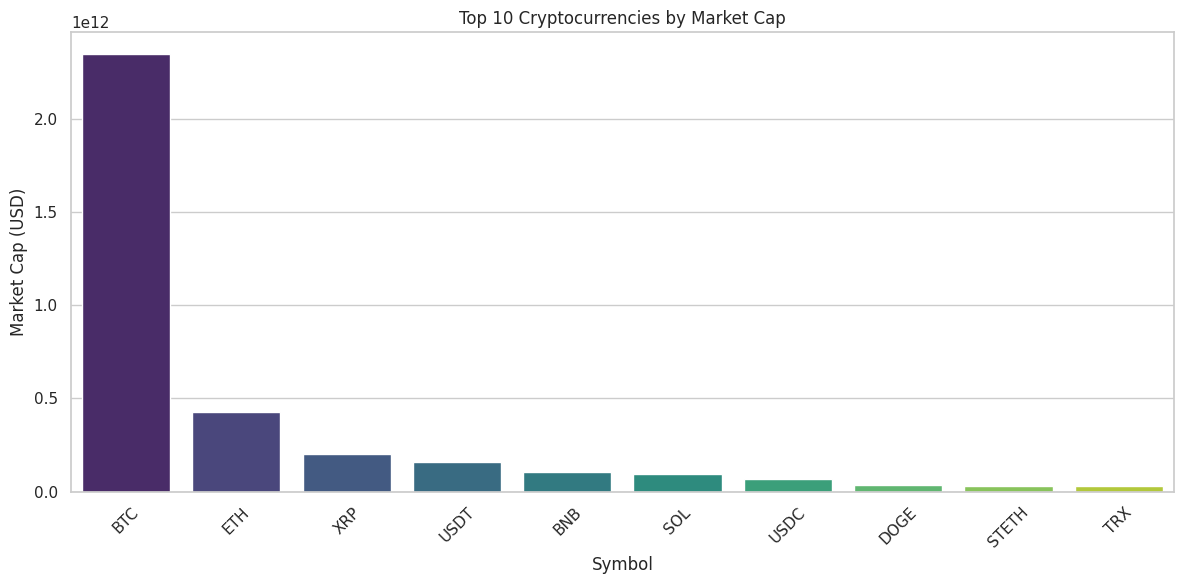

/tmp/ipython-input-9-1745202790.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Symbol', y='24h Change (%)', palette='coolwarm')


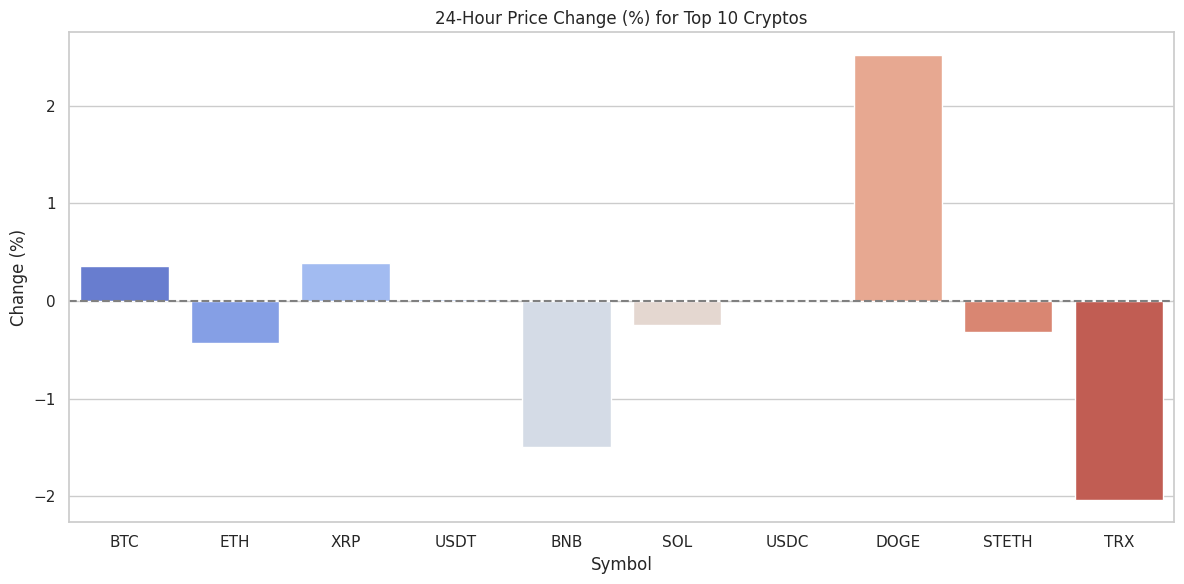

In [ ]:
# Set seaborn theme
sns.set(style="whitegrid")

# Bar plot - Top 10 coins by Market Cap
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Symbol', y='Market Cap', palette='viridis')
plt.title('Top 10 Cryptocurrencies by Market Cap')
plt.ylabel('Market Cap (USD)')
plt.xlabel('Symbol')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot - 24h % Price Change
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Symbol', y='24h Change (%)', palette='coolwarm')
plt.title('24-Hour Price Change (%) for Top 10 Cryptos')
plt.ylabel('Change (%)')
plt.xlabel('Symbol')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
# Export the DataFrame to CSV
df.to_csv("crypto_data.csv", index=False)

# Download it in Colab
from google.colab import files
files.download("crypto_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>